## Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('housing_price_dataset.csv')

In [3]:
data.shape[0]

50000

In [4]:
data.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [6]:
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [7]:
data.dropna(inplace= True)

In [8]:
data = data.drop_duplicates()

In [9]:
data.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [10]:
data['Neighborhood'].value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [11]:
data['Price'].min()

-36588.16539749279

In [12]:
data['Price'].max()

492195.2599720151

In [13]:
data['Price'].mean()

224827.32515099045

In [14]:
data['YearBuilt'].min()

1950

In [15]:
data['YearBuilt'].max()

2021

In [16]:
x= data.drop(columns=['Price'],axis=1)
y=data['Price']

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
train_data = x_train.join(y_train)

In [33]:
train_data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
28273,2351,3,1,Urban,1961,178812.653889
16336,1234,2,1,Urban,2014,77586.787380
5334,2127,3,1,Urban,1993,216363.526586
21786,1987,2,2,Rural,2003,229637.006928
10259,2484,3,3,Rural,1993,415280.055724


array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

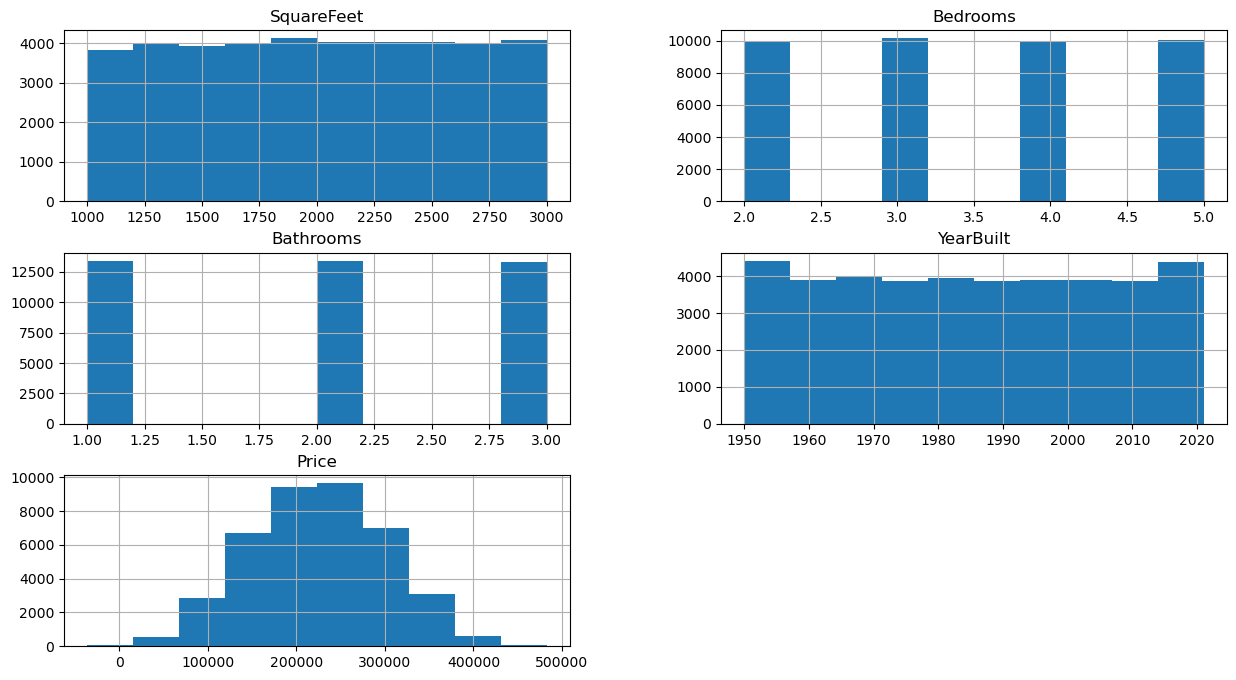

In [34]:
train_data.hist(figsize=(15, 8))

In [35]:
data_for_train=train_data.drop(columns=['Neighborhood'], axis=1)

<Axes: >

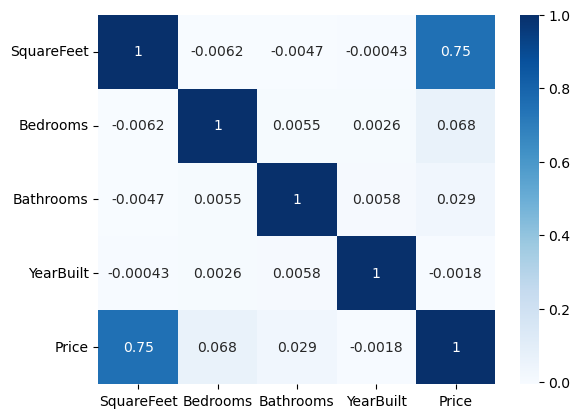

In [36]:
sns.heatmap(data_for_train.corr(), annot= True, cmap='Blues')

In [37]:
train_data.Neighborhood.value_counts()

Neighborhood
Suburb    13401
Rural     13355
Urban     13244
Name: count, dtype: int64

In [38]:
train_data=train_data.join(pd.get_dummies(train_data.Neighborhood).astype(int)).drop(['Neighborhood'], axis=1)

<Axes: >

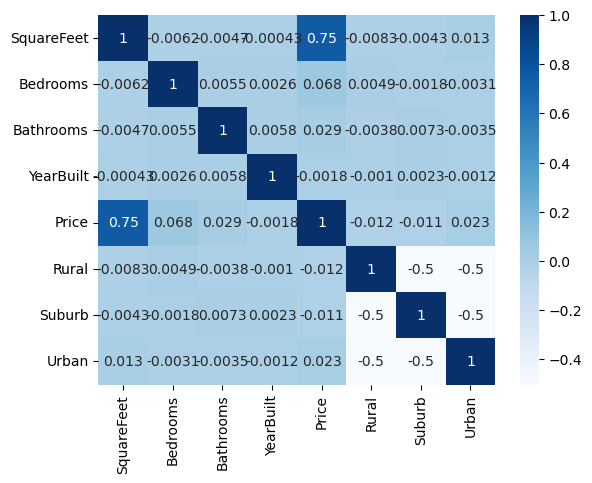

In [39]:
sns.heatmap(train_data.corr(), annot= True, cmap='Blues')

<Axes: xlabel='SquareFeet', ylabel='Bathrooms'>

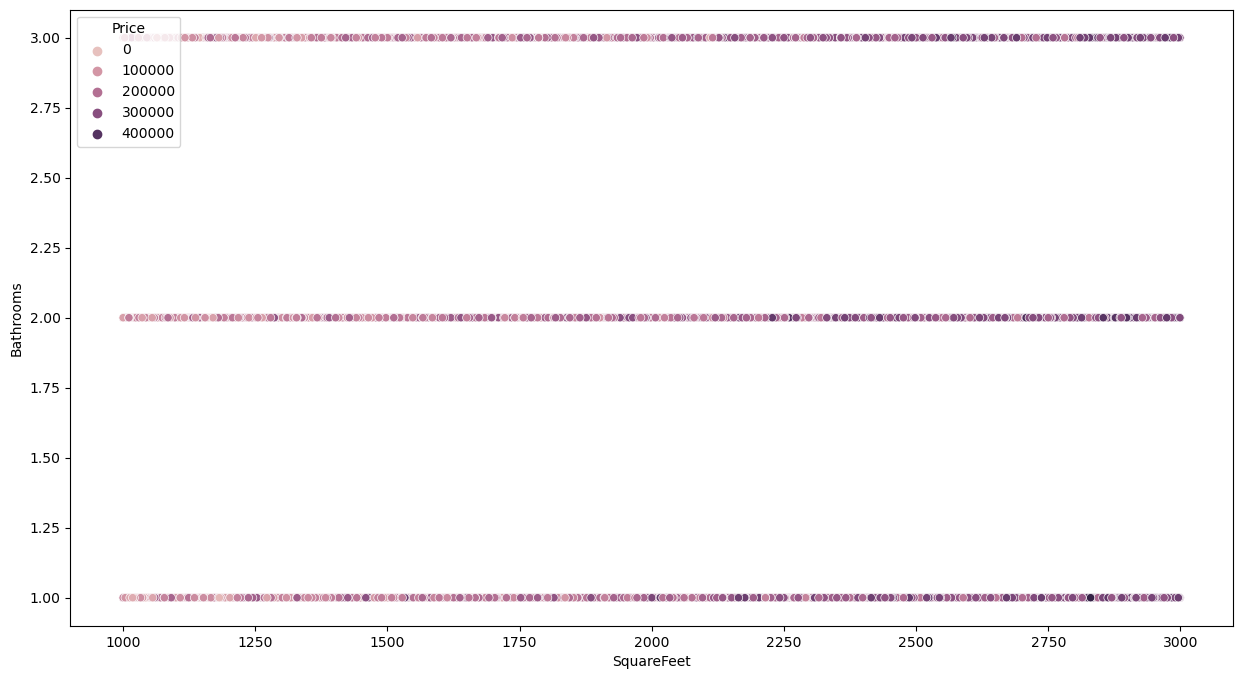

In [47]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='SquareFeet', y='Bathrooms', data=train_data, hue='Price'b)

In [48]:
train_data['bedrooms_ratio'] = train_data['Bedrooms']/train_data['Bathrooms']

In [49]:
train_data.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban,bedrooms_ratio
28273,2351,3,1,1961,178812.653889,0,0,1,3.0
16336,1234,2,1,2014,77586.787380,0,0,1,2.0
5334,2127,3,1,1993,216363.526586,0,0,1,3.0
21786,1987,2,2,2003,229637.006928,1,0,0,1.0
10259,2484,3,3,1993,415280.055724,1,0,0,1.0


## Préparation des données

### normaliser les données

In [34]:
#liste des colonnes numériques et catégorielle
numeric_features =['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
categorial_features = ['Neighborhood']

In [35]:
numeric_features

['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#pipeline de transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorial_features)
    ])


In [38]:
# Ajuster le préprocesseur avec les données pour obtenir les catégories de OneHotEncoder
preprocessor.fit(x)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SquareFeet', 'Bedrooms', 'Bathrooms',
                                  'YearBuilt']),
                                ('cat', OneHotEncoder(), ['Neighborhood'])])

In [39]:
# Fonction pour obtenir les noms des colonnes après le prétraitement
def get_feature_names(preprocessor, input_features):
    output_features = []
    for name, transformer, columns in preprocessor.transformers:
        if name == 'num':
            output_features.extend(columns)
        elif name == 'cat':
            encoder = transformer
            categories = encoder.get_feature_names_out(columns)
            output_features.extend(categories)
    return output_features

In [41]:
# Obtenir les noms des colonnes après le prétraitement
transformed_feature_names = get_feature_names(preprocessor, x.columns)

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
# Pipeline de sélection des caractéristiques avec Lasso
lasso = LassoCV()
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('feature_selection', SelectFromModel(lasso))])


In [32]:
# Obtenir les noms des colonnes après le prétraitement
transformed_feature_names = get_feature_names(preprocessor, x.columns)

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [27]:
# Affichage des caractéristiques sélectionnées
selected_features_lasso = pipeline_lasso.named_steps['feature_selection'].get_support()

In [28]:
print("Caractéristiques sélectionnées par Lasso:", x.columns[selected_features_lasso])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 7